**I asked chat gpt to improve my code this is what it gave me.**

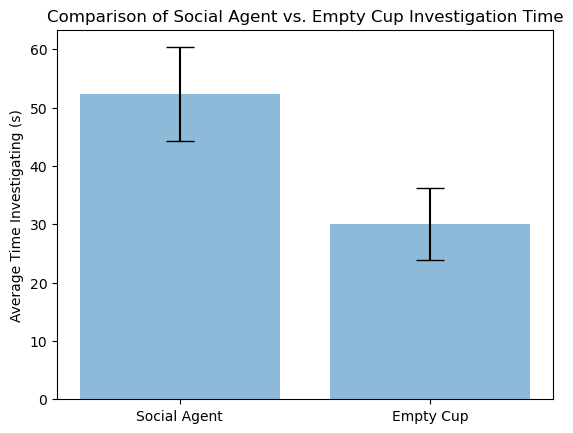

Cagemate vs. Empty:
t-statistic: 0.4833133544720802
p-value: 0.6363445456770658

Familiar vs. Empty:
t-statistic: 2.75991569824763
p-value: 0.015343254212607405


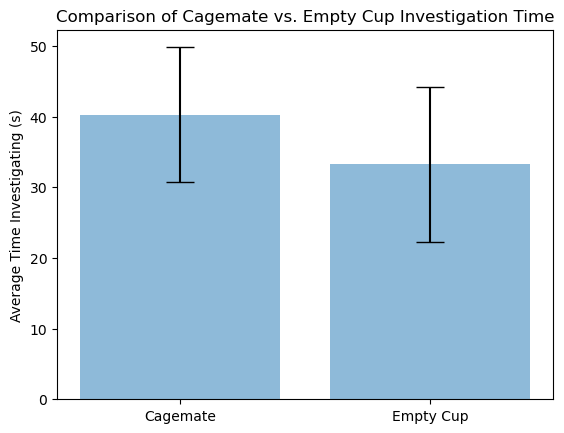

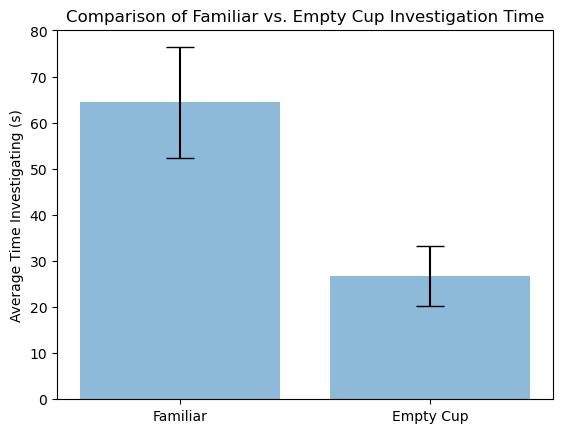

In [2]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the folder containing your CSV files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\cage*.csv")

# Read all CSV files and rename columns
def read_and_rename_columns(folder_path):
    data_frames = []
    for file in folder_path:
        df = pd.read_csv(file)
        for column in df.columns:
            if 'time investigating' in column:
                df = df.rename(columns={column: "_".join(column.split(" ")[0:2]).lower()})
        data_frames.append(df)
    return pd.concat(data_frames)

soc = read_and_rename_columns(folder_path)

# Plot average time investigating for social agent vs. empty cup
def plot_bar_with_sem(labels, means, sems, title):
    x = np.arange(len(labels))
    plt.bar(x, means, yerr=sems, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.xticks(x, labels)
    plt.ylabel('Average Time Investigating (s)')
    plt.title(title)
    plt.show()

# Calculate mean and SEM for social agent and empty cup
avg_social_agent = soc['social_agent'].mean()
avg_empty_cup = soc['empty_cup'].mean()
sem_social_agent = soc['social_agent'].sem()
sem_empty_cup = soc['empty_cup'].sem()

plot_bar_with_sem(['Social Agent', 'Empty Cup'], [avg_social_agent, avg_empty_cup], [sem_social_agent, sem_empty_cup], 'Comparison of Social Agent vs. Empty Cup Investigation Time')

# Filter data based on Animal notes column
cagemates = soc[soc['Animal notes'] == 'Cagemate']
familiar = soc[soc['Animal notes'] == 'Familiar']

# Perform t-tests comparing cagemate vs. empty and familiar vs. empty
t_stat_cagemate, p_value_cagemate = ttest_ind(cagemates['social_agent'], cagemates['empty_cup'])
t_stat_familiar, p_value_familiar = ttest_ind(familiar['social_agent'], familiar['empty_cup'])

# Print the results
print("Cagemate vs. Empty:")
print("t-statistic:", t_stat_cagemate)
print("p-value:", p_value_cagemate)

print("\nFamiliar vs. Empty:")
print("t-statistic:", t_stat_familiar)
print("p-value:", p_value_familiar)

# Calculate mean and SEM for cagemates and familiar
cagemate_mean = cagemates['social_agent'].mean()
familiar_mean = familiar['social_agent'].mean()
cagemate_sem = cagemates['social_agent'].sem()
familiar_sem = familiar['social_agent'].sem()

plot_bar_with_sem(['Cagemate', 'Empty Cup'], [cagemate_mean, cagemates['empty_cup'].mean()], [cagemate_sem, cagemates['empty_cup'].sem()], 'Comparison of Cagemate vs. Empty Cup Investigation Time')
plot_bar_with_sem(['Familiar', 'Empty Cup'], [familiar_mean, familiar['empty_cup'].mean()], [familiar_sem, familiar['empty_cup'].sem()], 'Comparison of Familiar vs. Empty Cup Investigation Time')
